In [1]:
import pandas as pd
from time import time
import os
import json
import numpy as np 
from time import time

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="white")

In [2]:
start_time = time()
with open("configuration.json", 'rt') as infile:
    config = json.load(infile)

S = ['target', 'UN', 'UNHCR', 'worldbank', 'ACLED', 'UN', 'WHO']

sources = [os.path.join(config['paths']['output'], 
                        d['name'], 
                        'data.csv') for d in config['sources'] if (d['name'] in S)]


# Generate a data frame with all indicators
df = pd.concat((pd.read_csv(f) for f in sources), sort=False, ignore_index=True)

# Summary stats
print("Sources            : {}".format(len(sources)))
print("Shape              : {} (rows) {} (columns)".format(*df.shape))
print("Geographies        : {}".format(len(df['Country Name'].unique())))
print("Indicators         : {}".format(len(df['Indicator Code'].unique())))
print("Temporal coverage  : {} -> {}".format(df.year.min(), df.year.max()))
print("Null values        : {}".format(sum(df['value'].isnull())))

print("\nLoaded data in {:3.2f} sec.".format(time() - start_time))

Sources            : 6
Shape              : 270893 (rows) 6 (columns)
Geographies        : 315
Indicators         : 50
Temporal coverage  : 1950 -> 2018
Null values        : 0

Loaded data in 0.43 sec.


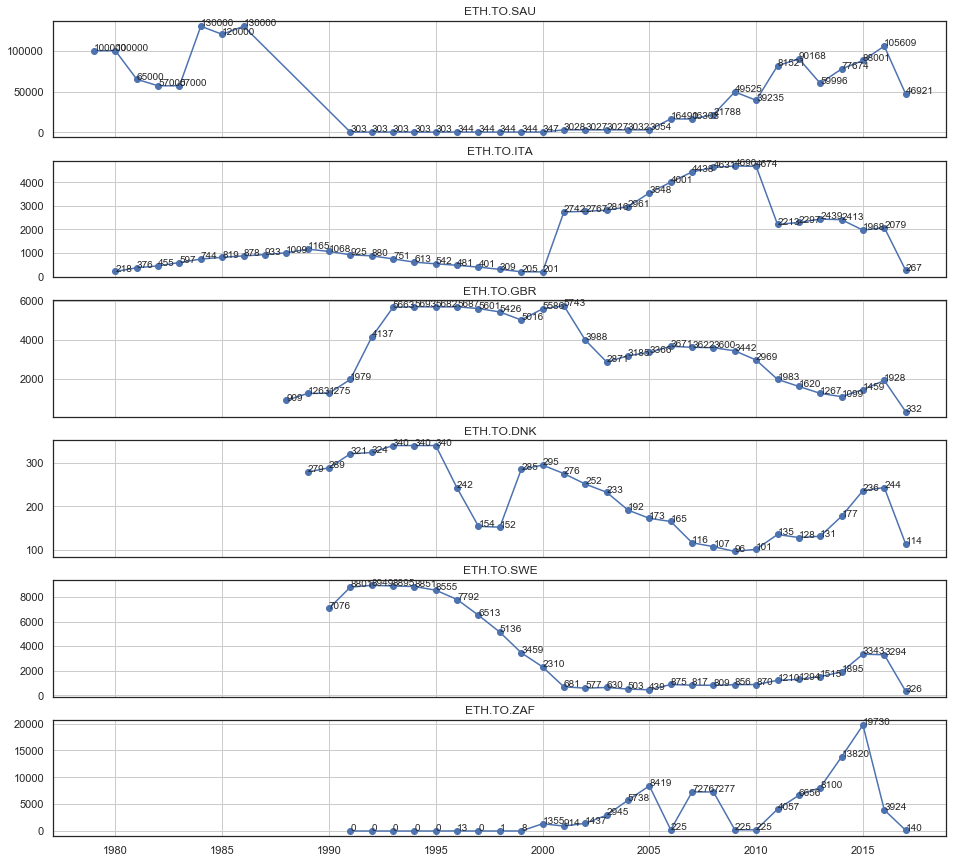

In [14]:
TARGETS = ['ETH.TO.SAU', 'ETH.TO.ITA', 
           'ETH.TO.GBR', 'ETH.TO.DNK',
           'ETH.TO.SWE', 'ETH.TO.ZAF']

fig, ax = plt.subplots(len(TARGETS), 1, 
                       figsize=(16, 15), 
                       sharex='col')

for i, t in enumerate(TARGETS):
    
    c1 = df['Country Code'] == 'ETH'
    c2 = df['Indicator Code'] == t
    
    tmp = df[c1 & c2].sort_values(by='year')
    
    ax[i].plot(tmp.year, tmp.value, 'o-')
    
    for ii, txt in enumerate(tmp.value.values.tolist()):
        ax[i].annotate("{:.0f}".format(txt), (tmp.year.iat[ii], tmp.value.iat[ii]))
    ax[i].set_title(t)
    ax[i].grid(True)

plt.savefig("img/targets.png", dpi=200)

In [29]:
# Generate an indicator list

start_time = time()
with open("configuration.json", 'rt') as infile:
    config = json.load(infile)


sources = [(d['name'], os.path.join(config['paths']['output'], 
                        d['name'], 
                        'data.csv')) for d in config['sources']]


# Generate a data frame with all indicators
df = pd.DataFrame()

for lbl, f in sources:
    tmp = pd.read_csv(f)
    tmp['Source'] = lbl
    df = pd.concat((df, tmp), sort=True)
# df = pd.concat((pd.read_csv(f) for f in sources), sort=False, ignore_index=True)

# Summary stats
print("Sources            : {}".format(len(sources)))
print("Shape              : {} (rows) {} (columns)".format(*df.shape))
print("Geographies        : {}".format(len(df['Country Name'].unique())))
print("Indicators         : {}".format(len(df['Indicator Code'].unique())))
print("Temporal coverage  : {} -> {}".format(df.year.min(), df.year.max()))
print("Null values        : {}".format(sum(df['value'].isnull())))

print("\nLoaded data in {:3.2f} sec.".format(time() - start_time))

df.drop(columns=['Country Code', 'Country Name', 'value'], inplace=True)
df.head()

Sources            : 9
Shape              : 416790 (rows) 7 (columns)
Geographies        : 353
Indicators         : 85
Temporal coverage  : 1946 -> 2018
Null values        : 30

Loaded data in 0.93 sec.


,Indicator Code,Indicator Name,Source,year
0,SP.POP.DPND,Age dependency ratio (% of working-age populat...,worldbank,1960
1,SP.DYN.TFRT.IN,"Fertility rate, total (births per woman)",worldbank,1960
2,SP.POP.2024.FE.5Y,"Population ages 20-24, female (% of female pop...",worldbank,1960
3,SP.POP.2024.MA.5Y,"Population ages 20-24, male (% of male populat...",worldbank,1960
4,SP.POP.2529.FE.5Y,"Population ages 25-29, female (% of female pop...",worldbank,1960


In [30]:
grp = df.groupby(['Source', 'Indicator Code', 'Indicator Name']).agg(np.max)
grp.reset_index()
grp.to_csv("Indicator.csv")